Total number of turbines: 74833


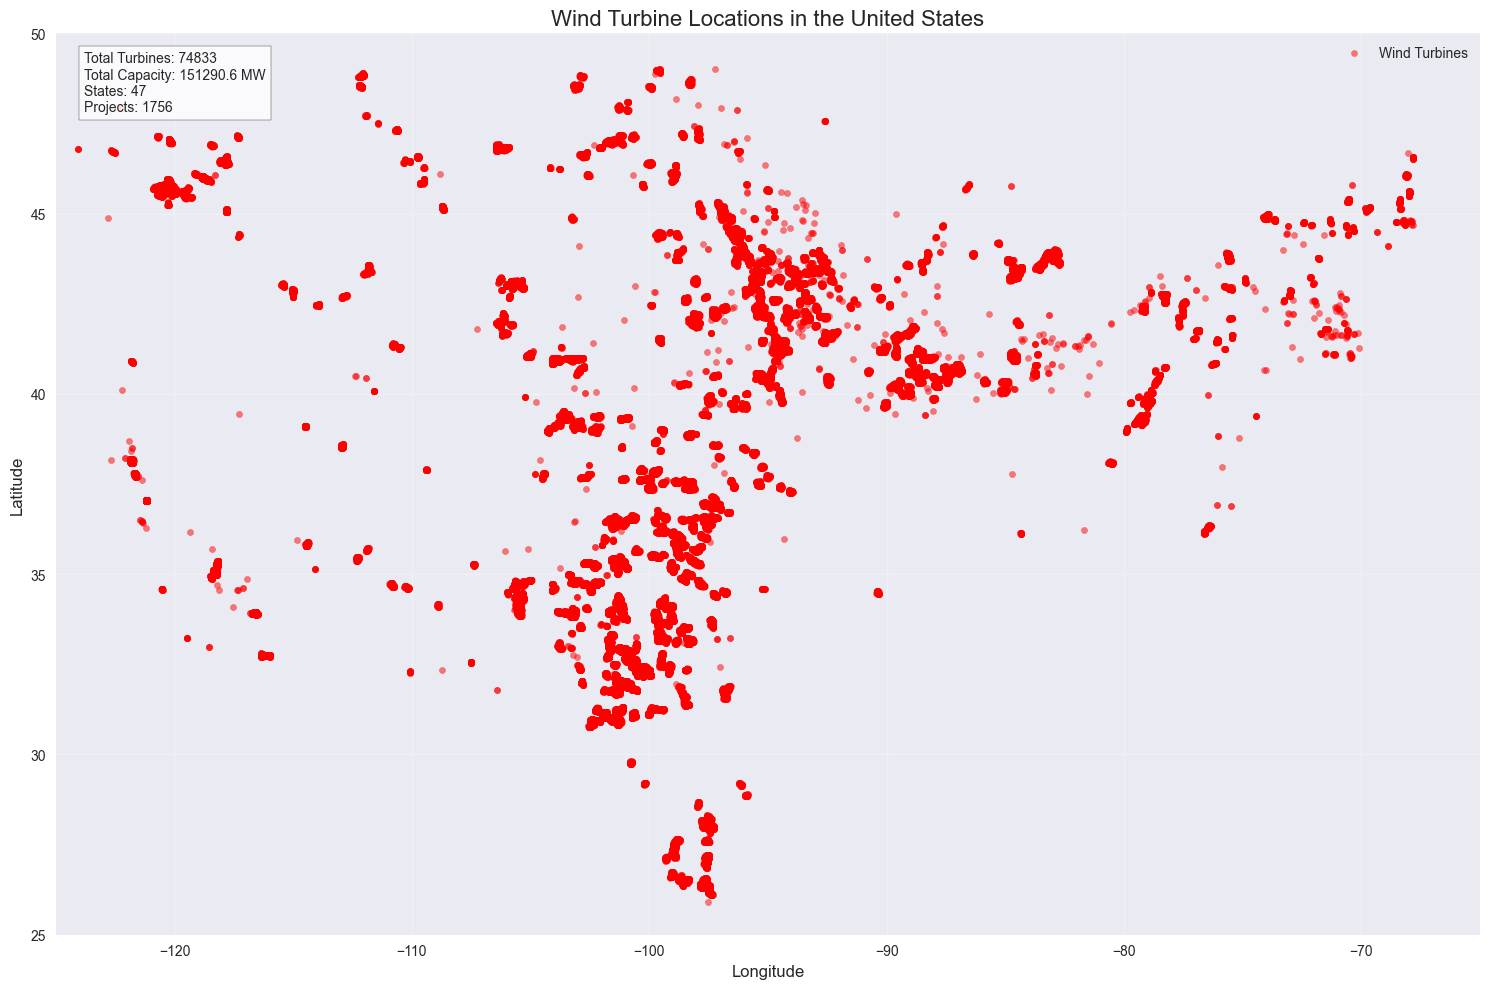


Top 10 states by total capacity:
         Number of Turbines  Total Capacity (kW)  Average Capacity (kW)  \
t_state                                                                   
TX                    18832           42136345.0                2237.49   
IA                     6383           13138877.0                2058.42   
OK                     5410           12617375.0                2332.23   
KS                     4238            9102395.0                2147.80   
IL                     3645            7914928.0                2171.45   
CA                     3761            6018146.0                1600.15   
CO                     2898            5385020.0                1858.18   
MN                     2726            4829940.0                1771.80   
NM                     1926            4318750.0                2242.34   
ND                     2090            4271480.0                2043.77   

         Number of Projects  
t_state                      
TX   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/us.csv')
print(f"Total number of turbines: {len(df)}")

fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(df['xlong'], df['ylat'], 
           alpha=0.5, 
           c='red',
           s=20,
           label='Wind Turbines')

plt.title('Wind Turbine Locations in the United States', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

stats_text = f"Total Turbines: {len(df)}\n"
stats_text += f"Total Capacity: {(df['t_cap'].sum()/1000):.1f} MW\n"
stats_text += f"States: {df['t_state'].nunique()}\n"
stats_text += f"Projects: {df['p_name'].nunique()}"

plt.text(0.02, 0.98, stats_text,
         transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top',
         fontsize=10)

plt.xlim(-125, -65)
plt.ylim(25, 50)

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

state_stats = df.groupby('t_state').agg({
    't_cap': ['count', 'sum', 'mean'],
    'p_name': 'nunique'
}).round(2)

state_stats.columns = ['Number of Turbines', 'Total Capacity (kW)', 
                      'Average Capacity (kW)', 'Number of Projects']
print("\nTop 10 states by total capacity:")
print(state_stats.sort_values('Total Capacity (kW)', 
                             ascending=False).head(10))